<a href="https://colab.research.google.com/github/Nour184/mushroom-predictor/blob/main/MushroomClassification_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import entropy

In [80]:
# Load the dataset
data = pd.read_csv('mushrooms 2.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##  Dataset Overview
Let's check the basic information about the dataset — number of rows, columns, and data types — to understand the structure and confirm that all features are categorical.


In [81]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [82]:
# Display number of rows and columns in the dataset
data.shape

(8124, 23)

In [83]:
data.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


##  Checking for Missing Values
Before preprocessing, we need to confirm that there are no missing or undefined values in any of the columns.


In [84]:
# Check for missing or null values in each column
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [85]:
# Check if any columns contain "?" or "unknown" entries
for col in data.columns:
    if (data[col] == '?').any():
        print(f"Column '{col}' contains '?' values.")

Column 'stalk-root' contains '?' values.


##  Class Distribution (Edible vs Poisonous)
Let's see how balanced the dataset is between edible and poisonous mushrooms.
A balanced dataset helps ensure that the classification model won’t be biased toward one class.


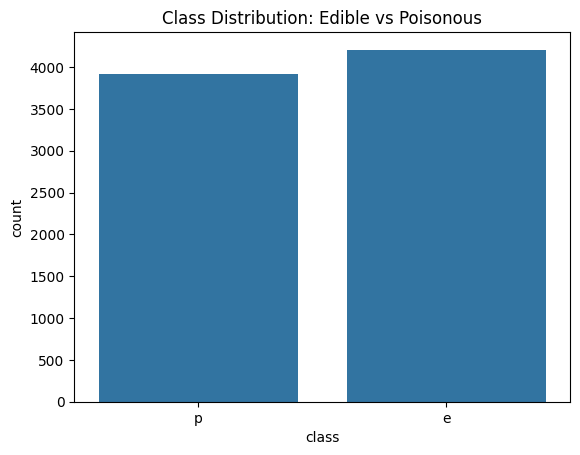

In [86]:
# Visualize 'class' distribution
sns.countplot(x='class', data=data)
plt.title("Class Distribution: Edible vs Poisonous")
plt.show()
# Creates a bar plot showing how many mushrooms belong to each class ('e' for edible, 'p' for poisonous)
# Helps verify if the dataset is balanced

##  Summary  
- The dataset contains all categorical features.  
- No missing or null values were found.  
- The dataset is well-balanced between edible and poisonous mushrooms.  




## Outlier Detection


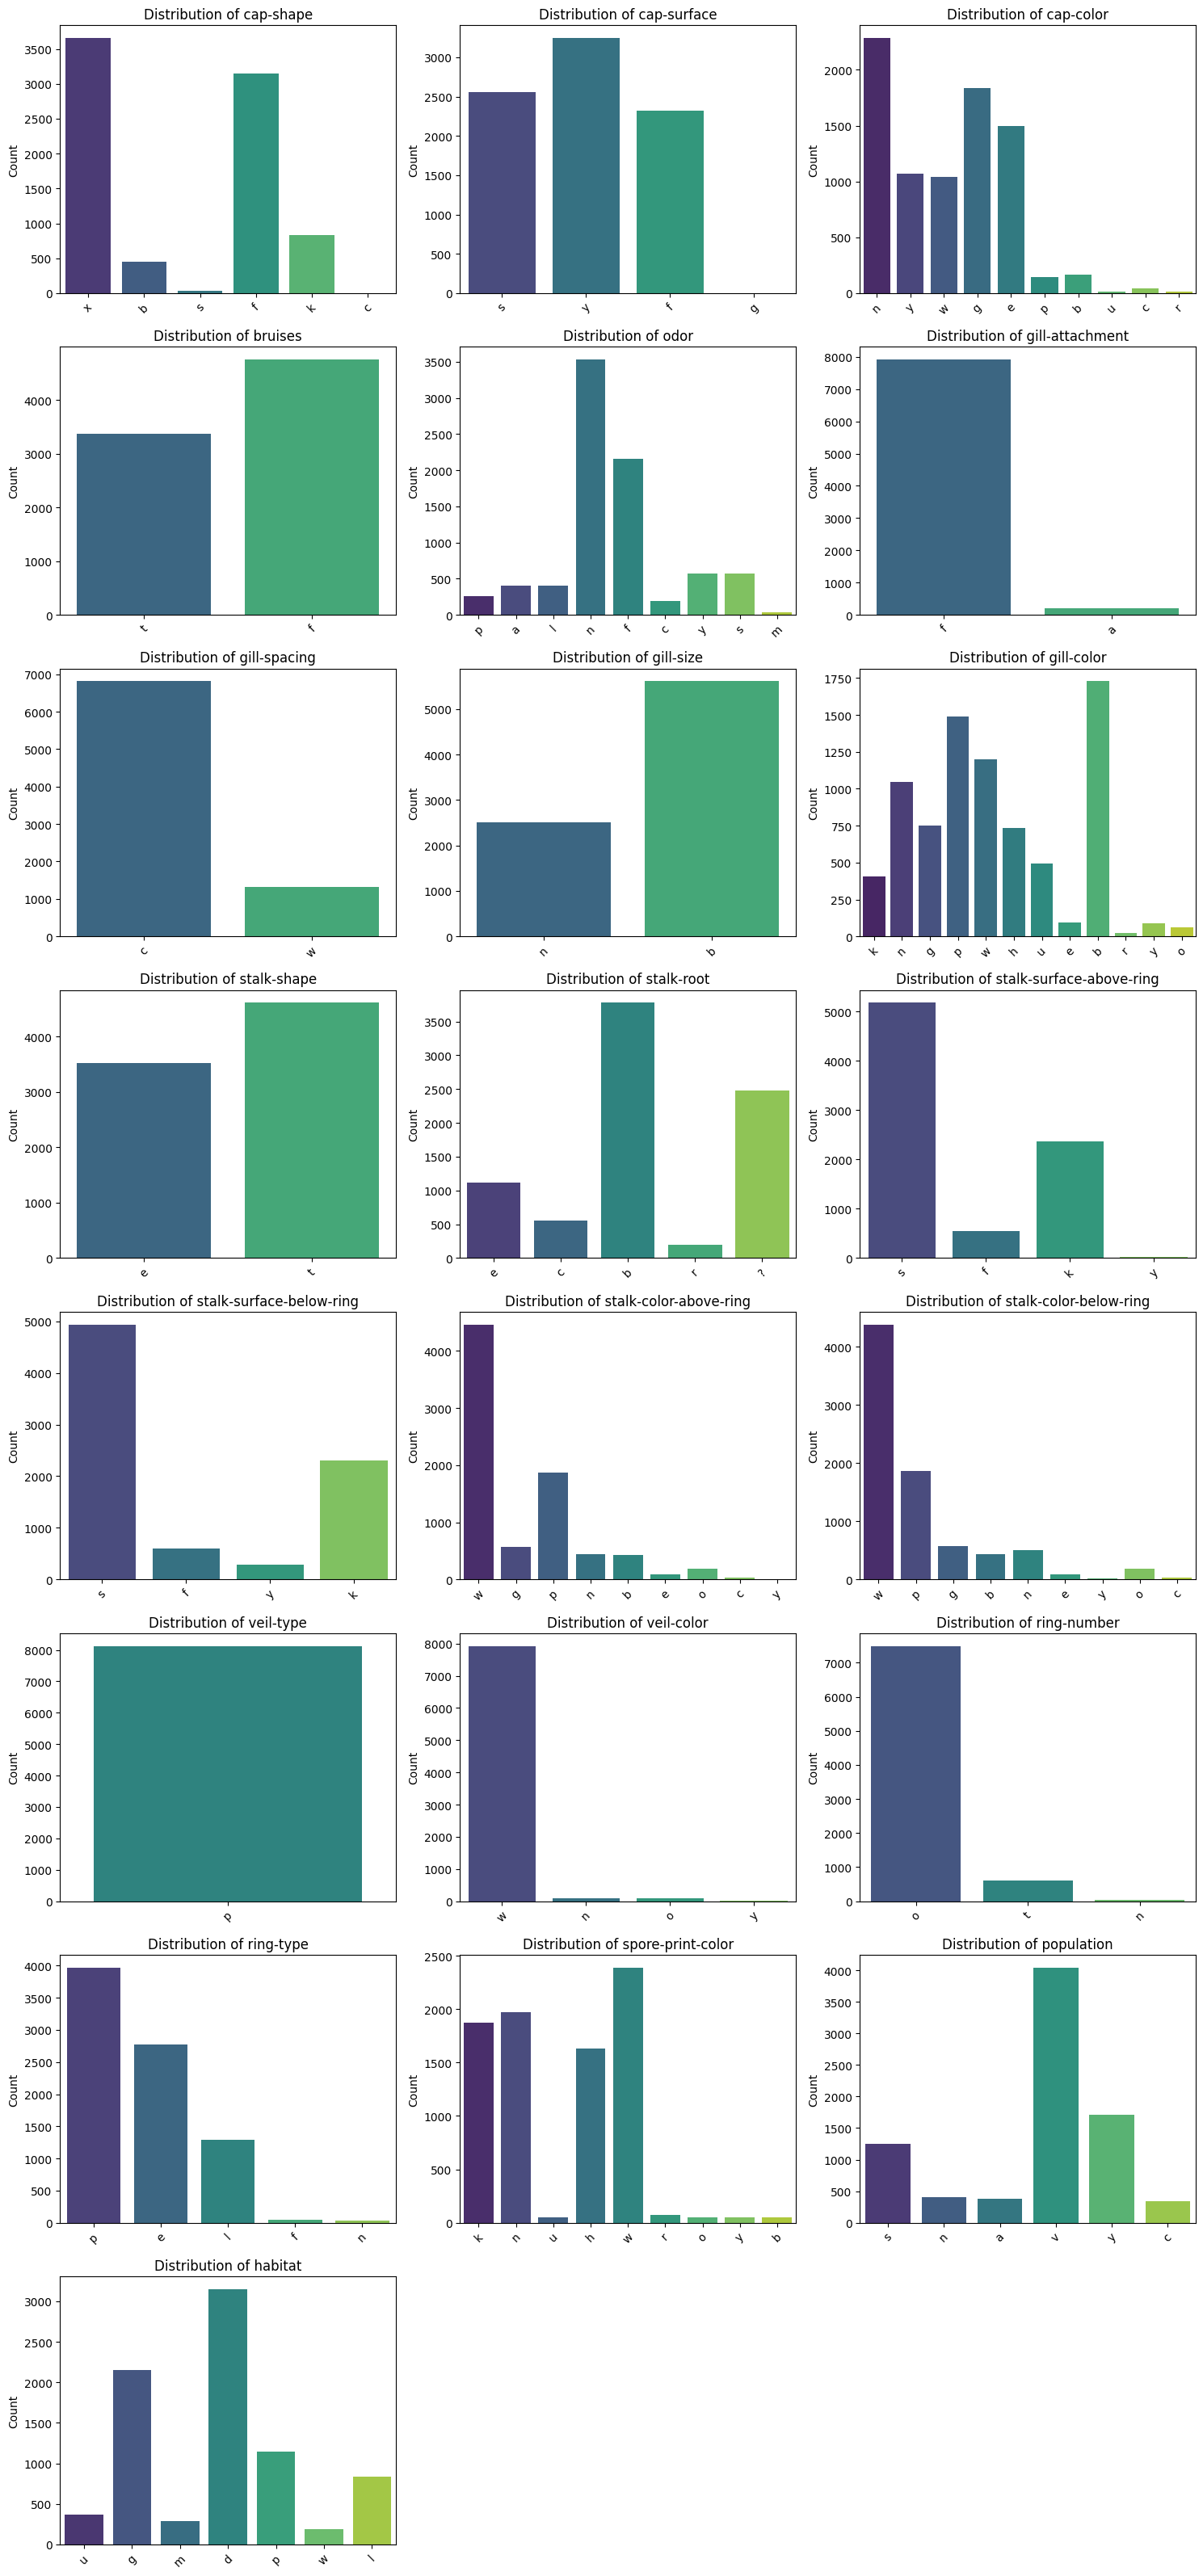

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Get all categorical feature names
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# If you have a target variable, remove it so only features remain
cat_cols = [col for col in cat_cols if col != 'class']

# Create subplots — 3 columns per row
n = len(cat_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, rows * 4))

# Loop through each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, hue=col, palette='viridis', legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [88]:
threshold = 0.01  # 1% cutoff
total_rows = len(data)

for col in data.select_dtypes(include=['object', 'category']).columns:
    freq = data[col].value_counts(normalize=True)  # relative frequency per category
    rare = freq[freq < threshold]  # categories below threshold
    if len(rare) > 0:
        print(f"\nOutlier categories in '{col}':")
        for cat, prop in rare.items():
            print(f"  {cat}: {prop*100:.2f}% of data")


Outlier categories in 'cap-shape':
  s: 0.39% of data
  c: 0.05% of data

Outlier categories in 'cap-surface':
  g: 0.05% of data

Outlier categories in 'cap-color':
  c: 0.54% of data
  u: 0.20% of data
  r: 0.20% of data

Outlier categories in 'odor':
  m: 0.44% of data

Outlier categories in 'gill-color':
  o: 0.79% of data
  r: 0.30% of data

Outlier categories in 'stalk-surface-above-ring':
  y: 0.30% of data

Outlier categories in 'stalk-color-above-ring':
  c: 0.44% of data
  y: 0.10% of data

Outlier categories in 'stalk-color-below-ring':
  c: 0.44% of data
  y: 0.30% of data

Outlier categories in 'veil-color':
  y: 0.10% of data

Outlier categories in 'ring-number':
  n: 0.44% of data

Outlier categories in 'ring-type':
  f: 0.59% of data
  n: 0.44% of data

Outlier categories in 'spore-print-color':
  r: 0.89% of data
  u: 0.59% of data
  o: 0.59% of data
  y: 0.59% of data
  b: 0.59% of data


In [89]:
for col in data.select_dtypes(include=['object', 'category']).columns:
    freq = data[col].value_counts(normalize=True)      
    rare_cats = freq[freq < threshold].index           
    if len(rare_cats) > 0:
        data[col] = data[col].replace(rare_cats, 'Other')  
        print(f"Replaced rare categories in '{col}' with 'Other'")

print("\n All rare categories (below threshold) have been grouped into 'Other'")


Replaced rare categories in 'cap-shape' with 'Other'
Replaced rare categories in 'cap-surface' with 'Other'
Replaced rare categories in 'cap-color' with 'Other'
Replaced rare categories in 'odor' with 'Other'
Replaced rare categories in 'gill-color' with 'Other'
Replaced rare categories in 'stalk-surface-above-ring' with 'Other'
Replaced rare categories in 'stalk-color-above-ring' with 'Other'
Replaced rare categories in 'stalk-color-below-ring' with 'Other'
Replaced rare categories in 'veil-color' with 'Other'
Replaced rare categories in 'ring-number' with 'Other'
Replaced rare categories in 'ring-type' with 'Other'
Replaced rare categories in 'spore-print-color' with 'Other'

 All rare categories (below threshold) have been grouped into 'Other'


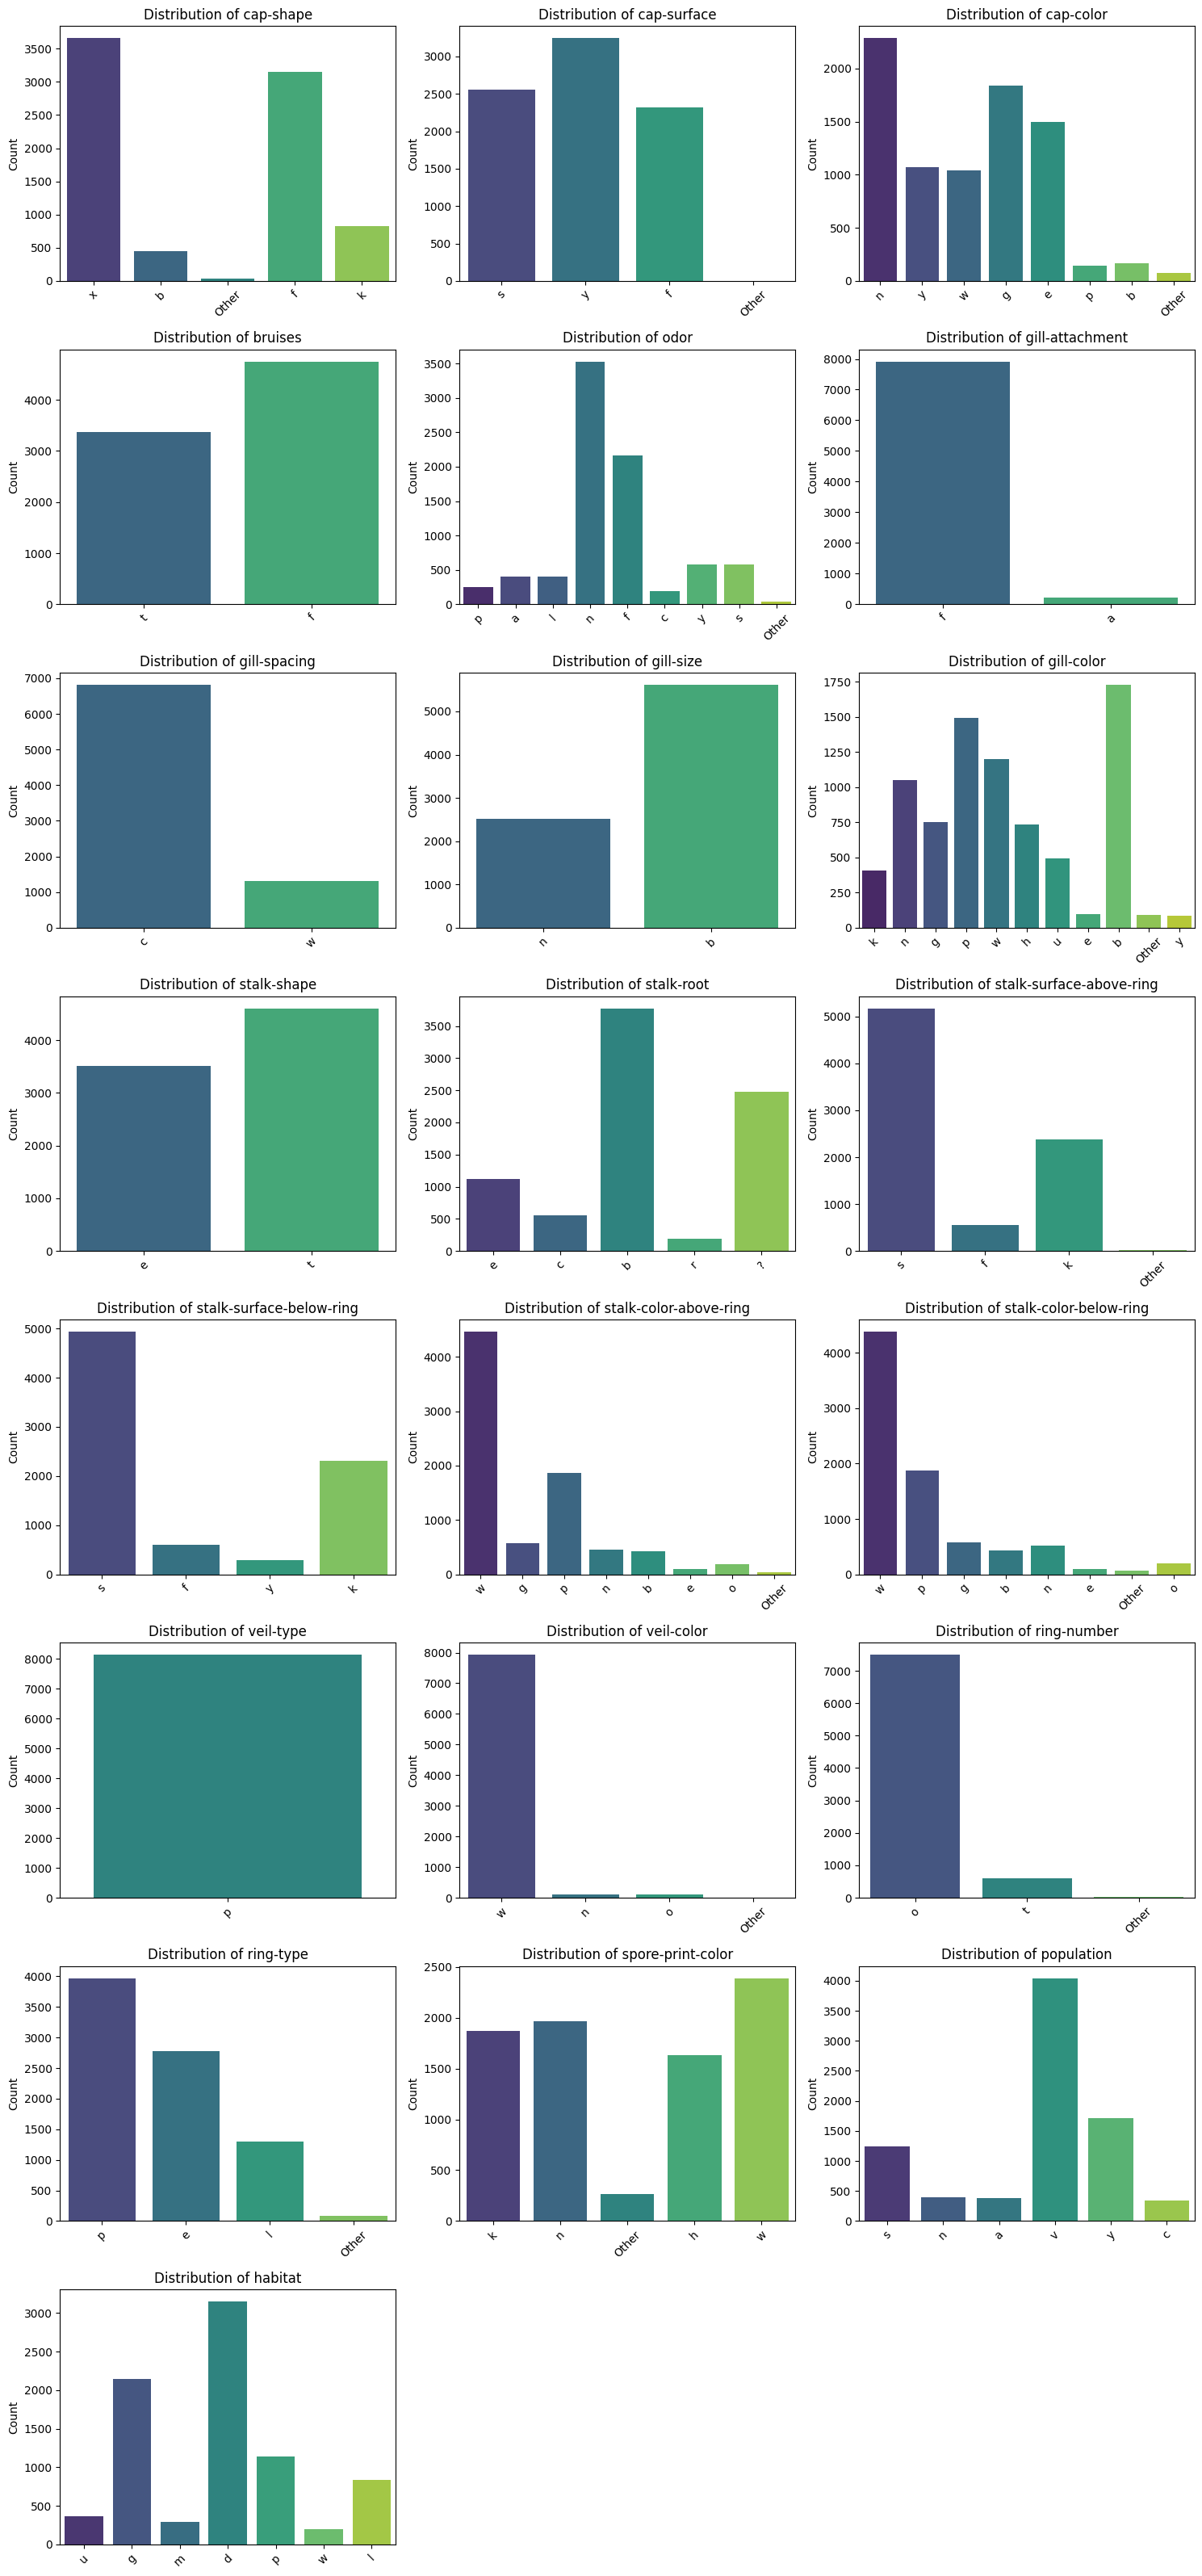

In [90]:


# Get all categorical feature names
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# If you have a target variable, remove it so only features remain
cat_cols = [col for col in cat_cols if col != 'class']

# Create subplots — 3 columns per row
n = len(cat_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, rows * 4))

# Loop through each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, hue=col, palette='viridis', legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [91]:
for col in data.select_dtypes(include=['object', 'category']).columns:
    freq = data[col].value_counts(normalize=True)   
    rare_cats = freq[freq < threshold].index        
    if len(rare_cats) > 0:
        data = data[~data[col].isin(rare_cats)]     
        print(f"Dropped rows with rare categories in '{col}'")

print(f"\nRemaining rows: {len(data)} ({len(data)/total_rows*100:.2f}% kept)")

Dropped rows with rare categories in 'cap-shape'
Dropped rows with rare categories in 'cap-surface'
Dropped rows with rare categories in 'cap-color'
Dropped rows with rare categories in 'odor'
Dropped rows with rare categories in 'gill-color'
Dropped rows with rare categories in 'stalk-surface-above-ring'
Dropped rows with rare categories in 'stalk-color-below-ring'
Dropped rows with rare categories in 'veil-color'
Dropped rows with rare categories in 'ring-type'

Remaining rows: 7739 (95.26% kept)


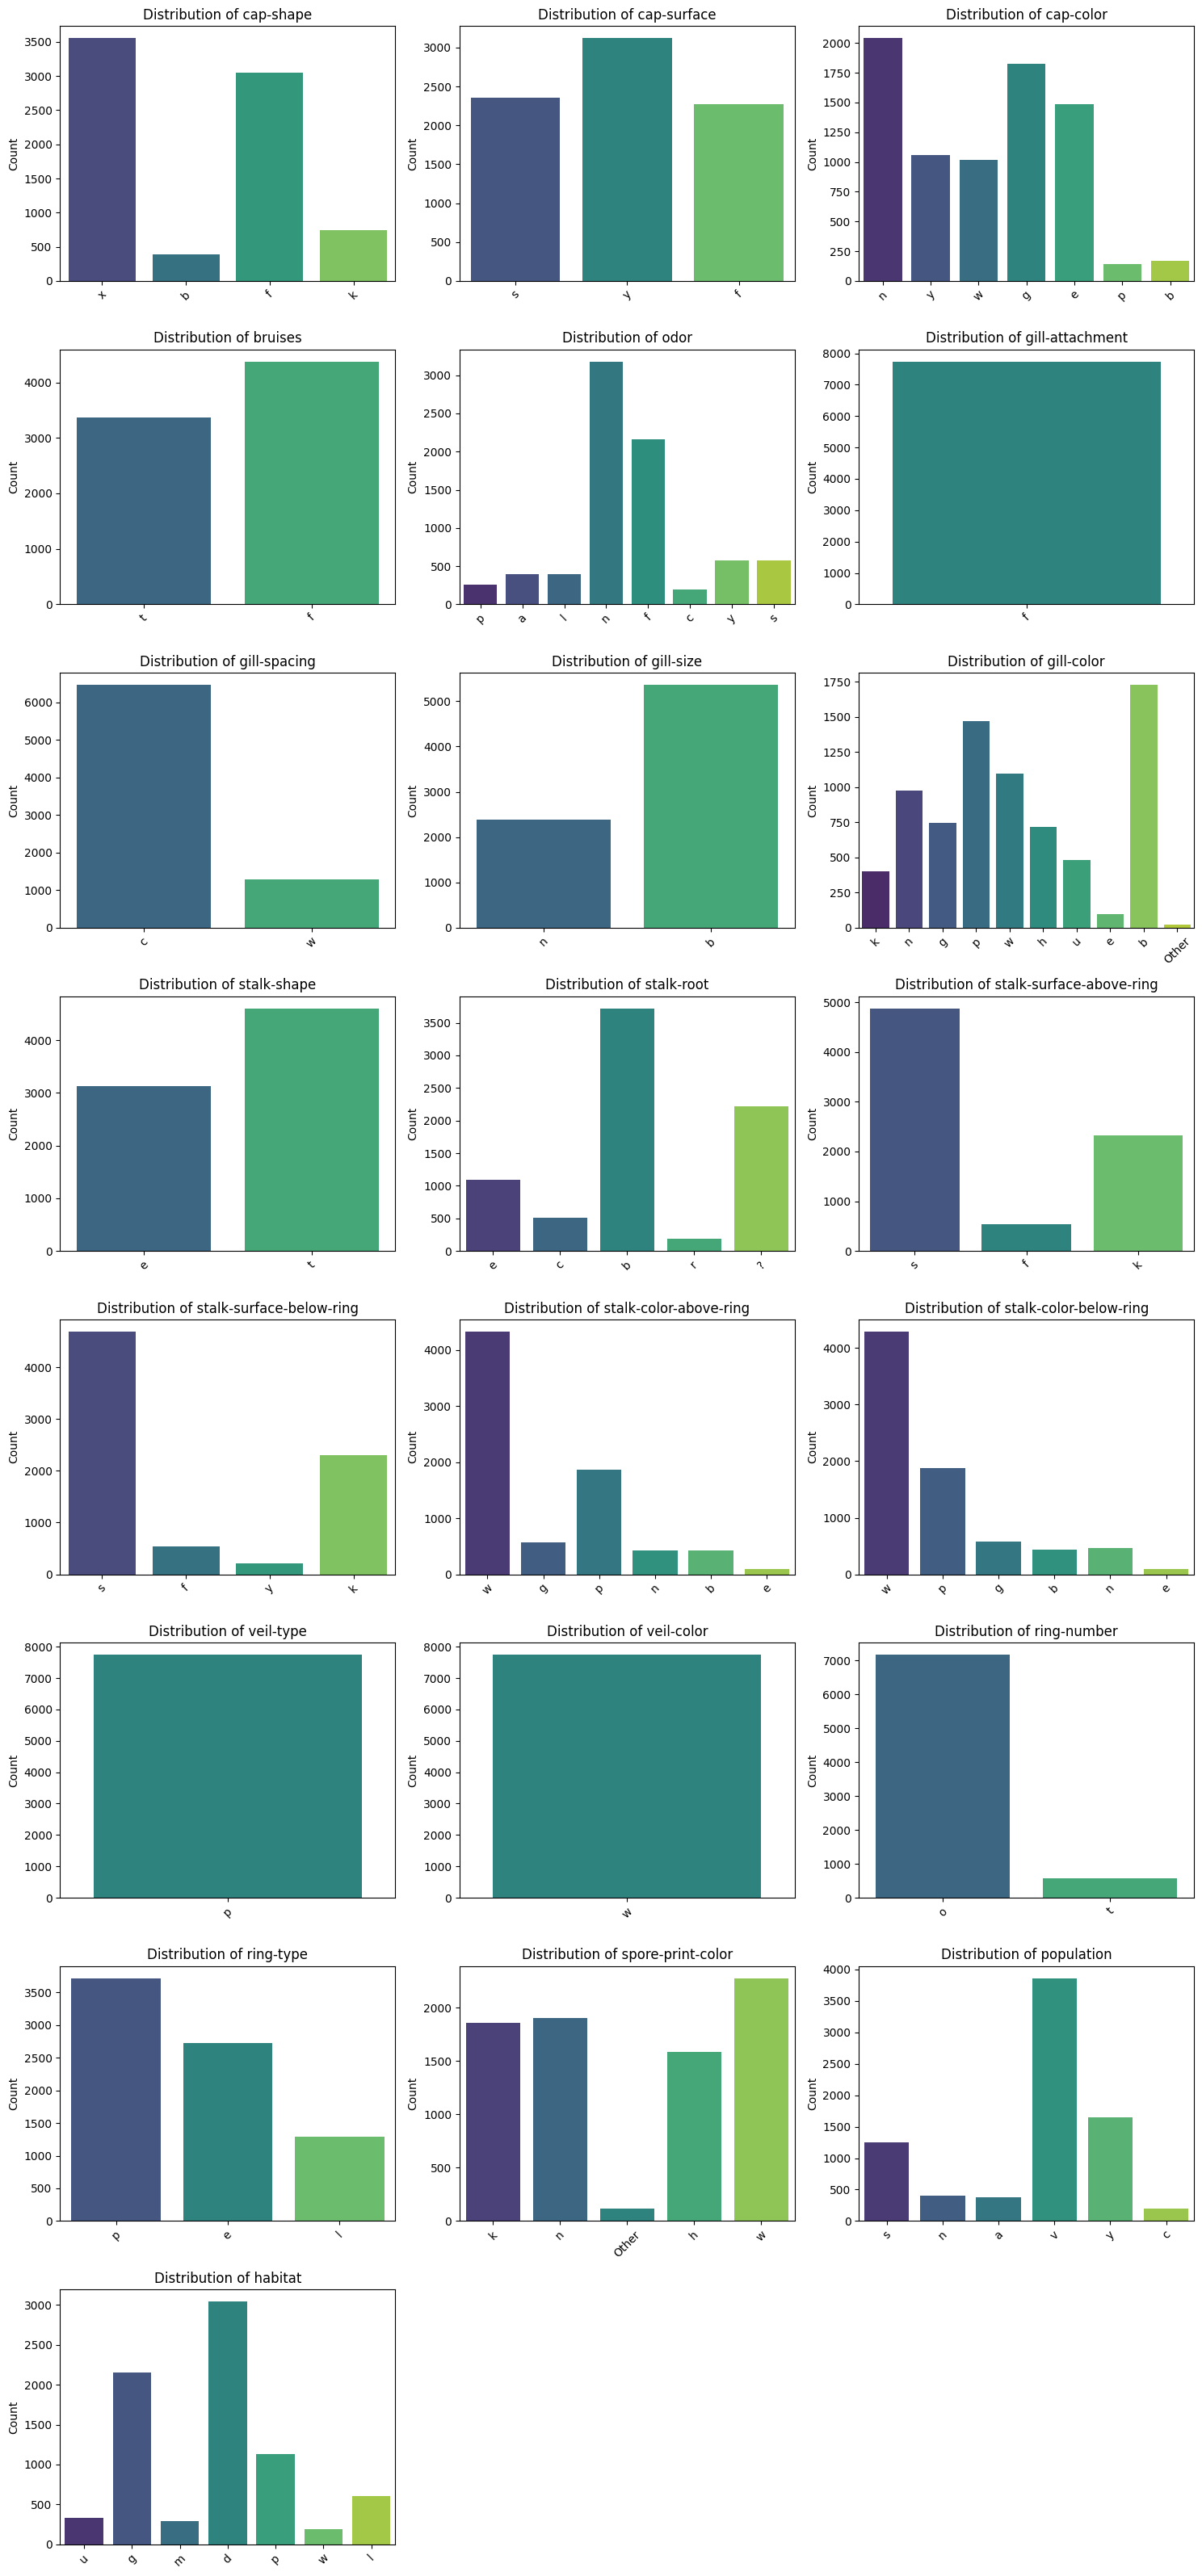

In [92]:

# Get all categorical feature names
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# If you have a target variable, remove it so only features remain
cat_cols = [col for col in cat_cols if col != 'class']

# Create subplots — 3 columns per row
n = len(cat_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, rows * 4))

# Loop through each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, hue=col, palette='viridis', legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [93]:
single_category_features = [col for col in data.columns if data[col].nunique() <= 1]

data = data.drop(columns=single_category_features)

print("Dropped features with a single category:", single_category_features)


Dropped features with a single category: ['gill-attachment', 'veil-type', 'veil-color']


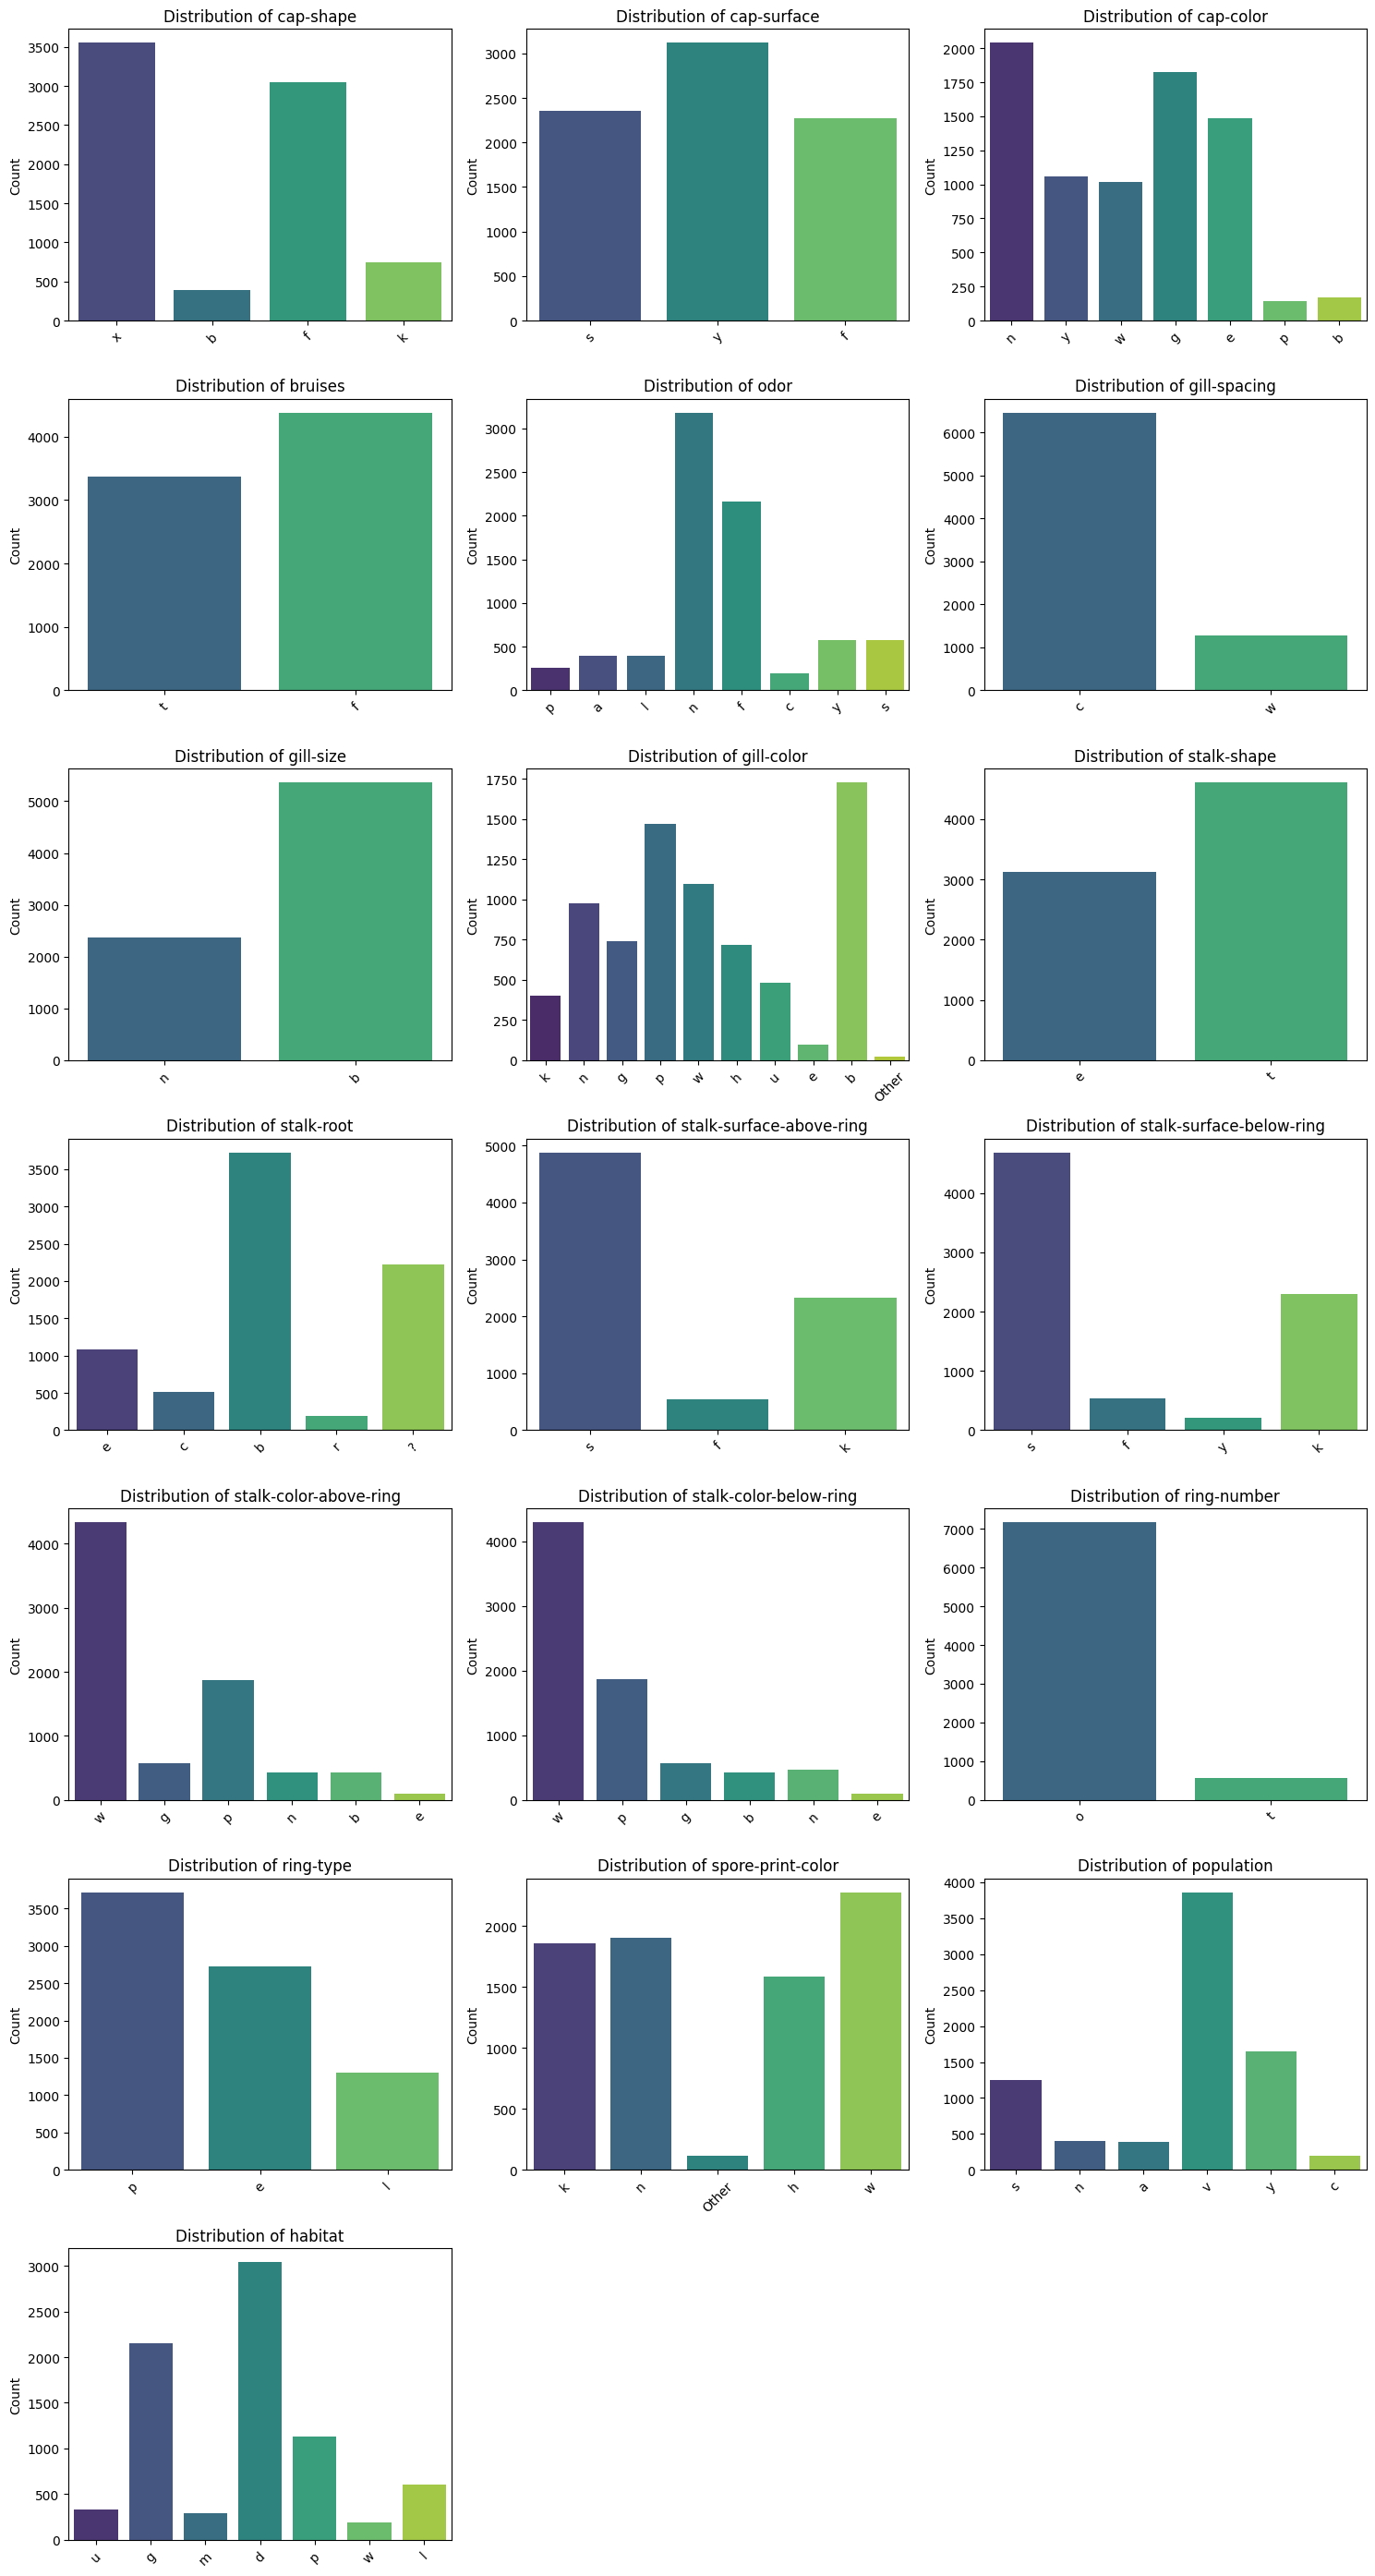

In [94]:


# Get all categorical feature names
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# If you have a target variable, remove it so only features remain
cat_cols = [col for col in cat_cols if col != 'class']

# Create subplots — 3 columns per row
n = len(cat_cols)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, rows * 4))

# Loop through each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=data, hue=col, palette='viridis', legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Handle missing values

Address the '?' values in the 'stalk-root' column.



Calculate the frequency of each unique value in 'stalk-root' to determine the best imputation strategy.



In [95]:
stalk_root_counts = data['stalk-root'].value_counts()
print(stalk_root_counts)

stalk-root
b    3723
?    2224
e    1088
c     512
r     192
Name: count, dtype: int64


We are going to try **three** different strategies

1.   Leave '?' as a unique class
2.   impute using mode
3.   impute using mode for the class of that specific mushroom

### First, Impute using mode



In [96]:
mode_stalk_root = data['stalk-root'].mode()[0]
data_impute_mode = data.copy()
data_impute_mode['stalk-root'] = data_impute_mode['stalk-root'].replace('?', mode_stalk_root)
print(data_impute_mode['stalk-root'].value_counts())

stalk-root
b    5947
e    1088
c     512
r     192
Name: count, dtype: int64


### Second, Impute using class mode

In [97]:
# Impute using mode for each class
data_impute_class_mode = data.copy()

for class_label in data_impute_class_mode['class'].unique():
    mode_class = data_impute_class_mode[data_impute_class_mode['class'] == class_label]['stalk-root'].mode()[0]
    data_impute_class_mode.loc[(data_impute_class_mode['class'] == class_label) & (data_impute_class_mode['stalk-root'] == '?'), 'stalk-root'] = mode_class

print(data_impute_class_mode['stalk-root'].value_counts())

stalk-root
b    5947
e    1088
c     512
r     192
Name: count, dtype: int64


**conclusion**: it didn't give different results, so we can ignore this strategy.

In [98]:
data_missing_class = data.copy()

## Encode categorical features

### Subtask:
Convert categorical features into a numerical format suitable for machine learning models, for both imputation strategies.


In [99]:
from sklearn.model_selection import train_test_split
# Encode categorical features for data_impute_mode
data_impute_mode_encoded = pd.get_dummies(data_impute_mode, drop_first=True)

# Convert boolean columns to integer type (0 or 1)
for col in data_impute_mode_encoded.columns:
    if data_impute_mode_encoded[col].dtype == 'bool':
        data_impute_mode_encoded[col] = data_impute_mode_encoded[col].astype(int)

# Split the data_impute_mode_encoded dataset
X_mode = data_impute_mode_encoded.drop('class_p', axis=1)
y_mode = data_impute_mode_encoded['class_p']

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

print("Shape of X_train_mode:", X_train_mode.shape)
print("Shape of X_test_mode:", X_test_mode.shape)
print("Shape of y_train_mode:", y_train_mode.shape)
print("Shape of y_test_mode:", y_test_mode.shape)

Shape of X_train_mode: (6191, 67)
Shape of X_test_mode: (1548, 67)
Shape of y_train_mode: (6191,)
Shape of y_test_mode: (1548,)


In [100]:
# Encode categorical features for data_missing_class
data_missing_class_encoded = pd.get_dummies(data_missing_class, drop_first=True)

# Convert boolean columns to integer type (0 or 1)
for col in data_missing_class_encoded.columns:
    if data_missing_class_encoded[col].dtype == 'bool':
        data_missing_class_encoded[col] = data_missing_class_encoded[col].astype(int)

# Split the data_missing_class_encoded dataset
X_missing = data_missing_class_encoded.drop('class_p', axis=1)
y_missing = data_missing_class_encoded['class_p']

X_train_missing, X_test_missing, y_train_missing, y_test_missing = train_test_split(X_missing, y_missing, test_size=0.2, random_state=42)

print("\nShape of X_train_missing:", X_train_missing.shape)
print("Shape of X_test_missing:", X_test_missing.shape)
print("Shape of y_train_missing:", y_train_missing.shape)
print("Shape of y_test_missing:", y_test_missing.shape)


Shape of X_train_missing: (6191, 68)
Shape of X_test_missing: (1548, 68)
Shape of y_train_missing: (6191,)
Shape of y_test_missing: (1548,)


In [101]:
# Create a dataset with categorical features for models that can handle them
X_categorical = data_missing_class.drop('class', axis=1)
y_categorical = data_missing_class['class']

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_categorical, y_categorical, test_size=0.2, random_state=42)

print("Shape of X_train_cat:", X_train_cat.shape)
print("Shape of X_test_cat:", X_test_cat.shape)
print("Shape of y_train_cat:", y_train_cat.shape)
print("Shape of y_test_cat:", y_test_cat.shape)

X_categorical_mode = data_impute_mode.drop('class', axis=1)
y_categorical_mode = data_impute_mode['class']

X_train_cat_mode, X_test_cat_mode, y_train_cat_mode, y_test_cat_mode = train_test_split(X_categorical_mode, y_categorical_mode, test_size=0.2, random_state=42)

print("\nShape of X_train_cat_mode:", X_train_cat_mode.shape)
print("Shape of X_test_cat_mode:", X_test_cat_mode.shape)
print("Shape of y_train_cat_mode:", y_train_cat_mode.shape)
print("Shape of y_test_cat_mode:", y_test_cat_mode.shape)

Shape of X_train_cat: (6191, 19)
Shape of X_test_cat: (1548, 19)
Shape of y_train_cat: (6191,)
Shape of y_test_cat: (1548,)

Shape of X_train_cat_mode: (6191, 19)
Shape of X_test_cat_mode: (1548, 19)
Shape of y_train_cat_mode: (6191,)
Shape of y_test_cat_mode: (1548,)


## Conclusion
The preprocessing steps resulted in four sets of training and testing data, each representing a different strategy for handling the missing values in the 'stalk-root' column and preparing the data for different types of machine learning models:

1. **Global Mode Imputation (One-Hot Encoded):** Missing values ('?') in the 'stalk-root' column were replaced with the overall mode of the column, and the features were one-hot encoded. This resulted in the datasets `X_train_mode`, `X_test_mode`, `y_train_mode`, and `y_test_mode`.

2. **Treating '?' as a Special Class (One-Hot Encoded):** Missing values ('?') in the 'stalk-root' column were kept as a distinct category during the one-hot encoding process. This resulted in the datasets `X_train_missing`, `X_test_missing`, `y_train_missing`, and `y_test_missing`.

3. **Global Mode Imputation (Categorical Features):** Missing values ('?') in the 'stalk-root' column were replaced with the overall mode of the column, and the features were left as categorical. This dataset is suitable for models that can handle categorical features directly. This resulted in the datasets `X_train_cat_mode`, `X_test_cat_mode`, `y_train_cat_mode`, and `y_test_cat_mode`.

4. **Treating '?' as a Special Class (Categorical Features):** Missing values ('?') in the 'stalk-root' column were kept as a distinct category, and the features were left as categorical. This dataset is suitable for models that can handle categorical features directly. This resulted in the datasets `X_train_cat`, `X_test_cat`, `y_train_cat`, and `y_test_cat`.

These four sets of data are now ready for training and evaluating machine learning models to determine which imputation and encoding strategies yield the best performance.

## Correlation Maps in 2 Ways

In [102]:
from scipy.stats import chi2_contingency

In [103]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))

cols = data.columns
n = len(cols)
cramers_results = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

for col1 in cols:
    for col2 in cols:
        cramers_results.loc[col1, col2] = cramers_v(data[col1], data[col2])



In [104]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))

# Calculate Cramér's V matrix
cols = data.columns
n = len(cols)
cramers_results = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

for col1 in cols:
    for col2 in cols:
        cramers_results.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Find the most correlated features (excluding self-correlation)
pairs = []
for i in range(n):
    for j in range(i+1, n):
        pairs.append((cols[i], cols[j], cramers_results.iloc[i, j]))

# Sort pairs by correlation descending
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)

# Print top correlated pairs
print("Top correlated feature pairs based on Cramér's V:")
for feature1, feature2, corr in pairs_sorted[:10]:  # change 10 to show more
    print(f"{feature1} ↔ {feature2}: {corr:.3f}")


Top correlated feature pairs based on Cramér's V:
class ↔ odor: 0.977
bruises ↔ ring-type: 0.814
gill-size ↔ gill-color: 0.811
odor ↔ gill-size: 0.793
ring-type ↔ spore-print-color: 0.773
class ↔ spore-print-color: 0.756
gill-color ↔ ring-type: 0.698
bruises ↔ odor: 0.694
odor ↔ ring-type: 0.686
class ↔ gill-color: 0.685


In [105]:
def theils_u(x, y):
   
    s_xy = pd.crosstab(x, y)
    
    pxy = s_xy / s_xy.sum().sum()
    px = pxy.sum(axis=1)
    py = pxy.sum(axis=0)
    h_x = entropy(px, base=2)
    h_xy = entropy(pxy.values.flatten(), base=2)
    h_x_given_y = h_xy - entropy(py, base=2)
    if h_x == 0:
        return 1.0
    return (h_x - h_x_given_y) / h_x

cols = data.columns
n = len(cols)
theils_results = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)

for col1 in cols:
    for col2 in cols:
        theils_results.loc[col1, col2] = theils_u(data[col1], data[col2])

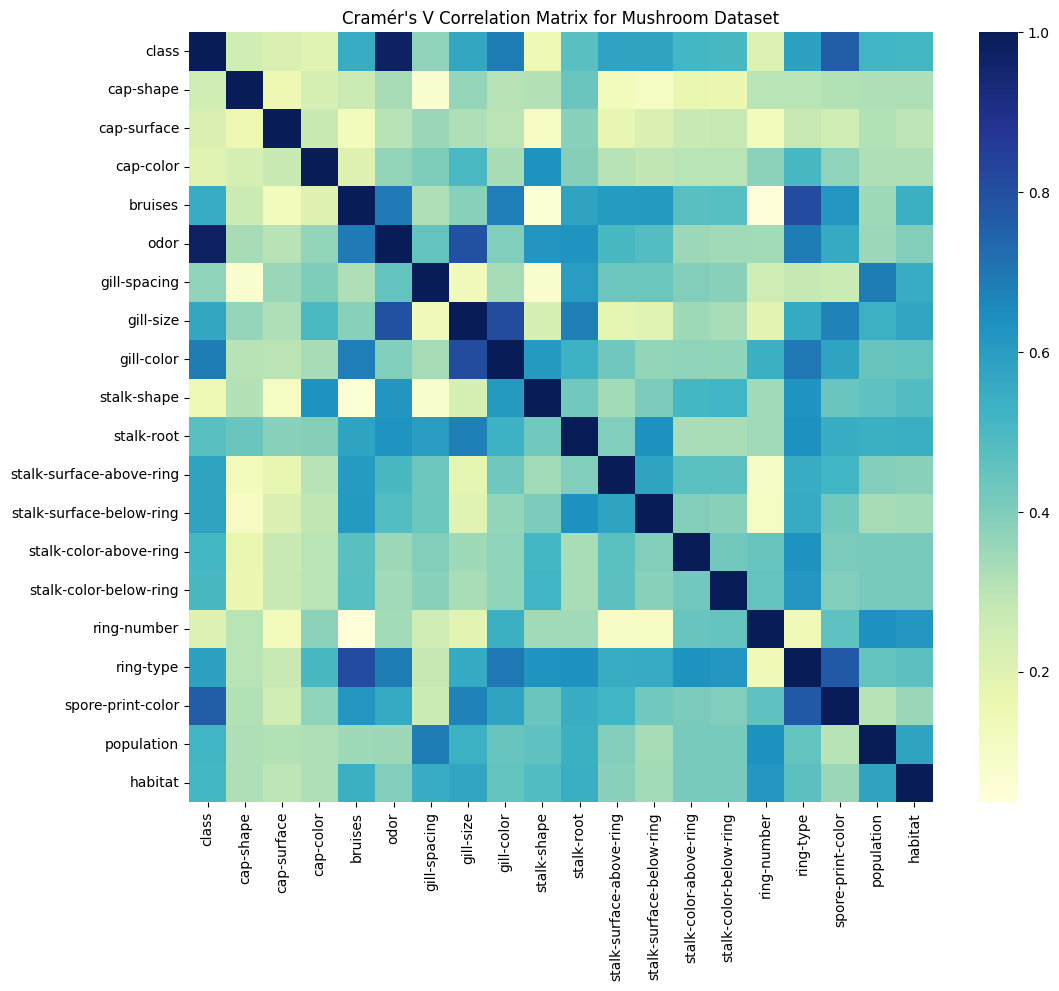

In [106]:
plt.figure(figsize=(12,10))
sns.heatmap(cramers_results, cmap="YlGnBu", annot=False)
plt.title("Cramér's V Correlation Matrix for Mushroom Dataset")
plt.show()

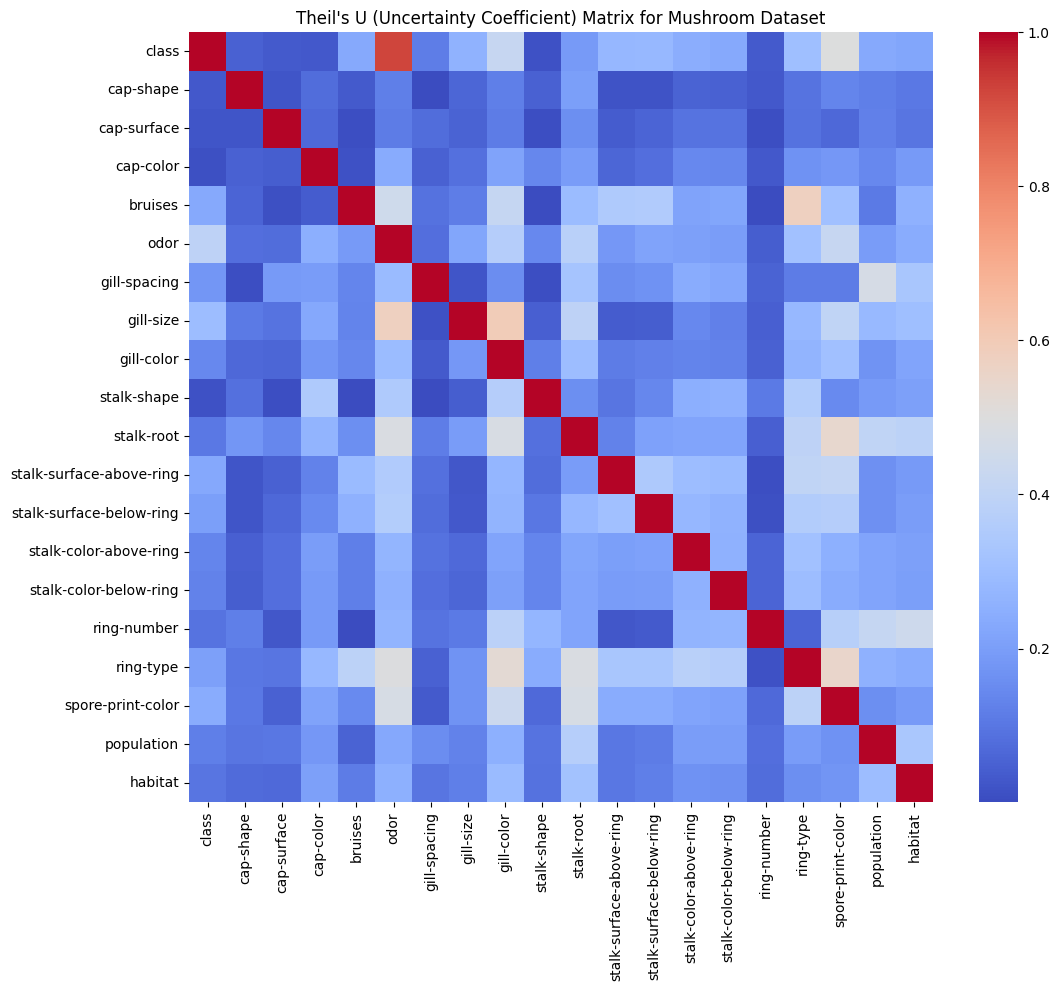

In [107]:
plt.figure(figsize=(12,10))
sns.heatmap(theils_results, cmap="coolwarm", annot=False)
plt.title("Theil's U (Uncertainty Coefficient) Matrix for Mushroom Dataset")
plt.show()

In [108]:
# For each feature, find the feature that gives the most information about it
print("\nMost informative feature for each feature based on Theil's U:")
for col in cols:
    # Exclude self
    others = theils_results.loc[theils_results.index != col, col]
    max_feature = others.idxmax()
    max_value = others[max_feature]
    print(f"{max_feature} → {col}: {max_value:.3f}")



Most informative feature for each feature based on Theil's U:
odor → class: 0.395
stalk-root → cap-shape: 0.178
gill-spacing → cap-surface: 0.191
stalk-shape → cap-color: 0.350
ring-type → bruises: 0.387
class → odor: 0.923
population → gill-spacing: 0.155
class → gill-size: 0.261
gill-size → gill-color: 0.595
ring-number → stalk-shape: 0.271
ring-type → stalk-root: 0.486
bruises → stalk-surface-above-ring: 0.350
bruises → stalk-surface-below-ring: 0.355
ring-type → stalk-color-above-ring: 0.378
ring-type → stalk-color-below-ring: 0.365
stalk-shape → ring-number: 0.106
bruises → ring-type: 0.577
ring-type → spore-print-color: 0.547
gill-spacing → population: 0.472
ring-number → habitat: 0.446
